In [75]:
import pandas as pd
import numpy as np

In [76]:
df_1 = pd.read_csv('data/archive/15_9-23.csv')
df_2 = pd.read_csv('data/archive/16_2-7.csv')
df_3 = pd.read_csv('data/archive/16_7-6.csv')
df_4 = pd.read_csv('data/archive/17_4-1.csv')
#df_5 = pd.read_csv('data/archive/25_5_3_well.csv')
#df_6 = pd.read_csv('data/archive/25_10_10_well.csv')
df_7 = pd.read_csv('data/archive/25_10-9.csv')
#df_8 = pd.read_csv('data/archive/25_11_24_well.csv')
df_9 = pd.read_csv('data/archive/31_2-10.csv')
df_10 = pd.read_csv('data/archive/31_2-21 S.csv')
df_11 = pd.read_csv('data/archive/31_6-5.csv')
df_12 = pd.read_csv('data/archive/31_6-8.csv')
#df_13 = pd.read_csv('data/archive/34_3_3_A_well.csv')
df_14 = pd.read_csv('data/archive/34_3-2 S.csv')
#df_15 = pd.read_csv('data/archive/34_6_1_S_well.csv')
#df_16 = pd.read_csv('data/archive/34_10_16_R_well.csv')
#df_17 = pd.read_csv('data/archive/35_6_2_S_well.csv')
#df_18 = pd.read_csv('data/archive/35_9_8_well.csv')
df_19 = pd.read_csv('data/archive/35_9-7.csv')
#df_20 = pd.read_csv('data/archive/29_3_1_well.csv')

In [77]:
df = pd.concat([df_1, df_2, df_3, df_4,df_7, df_9, df_10,  
                df_11, df_12, df_14, df_19,])

In [78]:
df.tail(5)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,Unnamed: 0,DEPT
10672,35/9-7,2973.2988,536096.0625,6793022.0,-2943.444580,BAAT GP.,Etive Fm.,8.276272,NaN,2.820439,...,NaN,0.502458,NaN,2.311106,24.306124,NaN,65000.0,2.0,NaN,NaN
10673,35/9-7,2973.4508,536096.0625,6793022.0,-2943.595947,BAAT GP.,Etive Fm.,8.267273,NaN,3.020778,...,NaN,0.374753,NaN,1.853418,22.201078,NaN,65000.0,2.0,NaN,NaN
10674,35/9-7,2973.6028,536096.0625,6793022.0,-2943.747559,BAAT GP.,Etive Fm.,8.250099,NaN,2.795711,...,NaN,0.211487,NaN,1.325961,20.096741,NaN,65000.0,2.0,NaN,NaN
10675,35/9-7,2973.7548,536096.0625,6793022.0,-2943.899170,BAAT GP.,Etive Fm.,NaN,NaN,2.658694,...,NaN,0.147950,NaN,1.260347,17.992323,NaN,65000.0,2.0,NaN,NaN
10676,35/9-7,2973.9068,536096.0625,6793022.0,-2944.050537,BAAT GP.,Etive Fm.,NaN,NaN,2.802693,...,NaN,0.174232,NaN,1.266063,15.889325,NaN,65000.0,2.0,NaN,NaN


In [79]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'Unnamed: 0', 'DEPT'],
      dtype='object')

In [80]:
len(list(df.columns))

31

In [81]:
df.shape

(122117, 31)

In [82]:
df.dtypes

WELL                                  object
DEPTH_MD                             float64
X_LOC                                float64
Y_LOC                                float64
Z_LOC                                float64
GROUP                                 object
FORMATION                             object
CALI                                 float64
RSHA                                 float64
RMED                                 float64
RDEP                                 float64
RHOB                                 float64
GR                                   float64
SGR                                  float64
NPHI                                 float64
PEF                                  float64
DTC                                  float64
SP                                   float64
BS                                   float64
ROP                                  float64
DTS                                  float64
DCAL                                 float64
DRHO      

In [83]:
print(f'Уникальных скважин - {df.WELL.nunique()}')

Уникальных скважин - 9


In [84]:
df.WELL.unique()

array(['15/9-23', '16/2-7', '16/7-6', '17/4-1', '25/10-9', '31/2-10',
       '31/2-21 S', nan, '34/3-2 S', '35/9-7'], dtype=object)

In [85]:
lithology_keys = {30000: 'Sandstone',
                  65030: 'Sandstone/Shale',
                  65000: 'Shale',
                  80000: 'Marl',
                  74000: 'Dolomite',
                  70000: 'Limestone',
                  70032: 'Chalk',
                  88000: 'Halite',
                  86000: 'Anhydrite',
                  99000: 'Tuff',
                  90000: 'Coal',
                  93000: 'Basement'}

In [94]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000., 65030., 70000., 30000., 99000., 70032., 80000., 90000.,
       86000., 74000., 88000.])

In [87]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

FORCE_2020_LITHOFACIES_LITHOLOGY
65000.0    69305
30000.0    14794
65030.0    10507
70000.0     8721
88000.0     6498
80000.0     5266
70032.0     2905
99000.0     2366
86000.0      597
74000.0      269
90000.0      196
Name: count, dtype: int64

In [90]:
df[df['WELL'].isna()]['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([   nan, 65000., 30000., 70000., 65030., 99000., 80000., 90000.])

In [91]:
df = df.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])

In [73]:
df_ = pd.read_csv('data/archive/29_3_1_well.csv')


In [74]:
df_.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO'],
      dtype='object')

In [93]:
df[['FORCE_2020_LITHOFACIES_LITHOLOGY']].isna().count()

FORCE_2020_LITHOFACIES_LITHOLOGY    121424
dtype: int64

<Axes: >

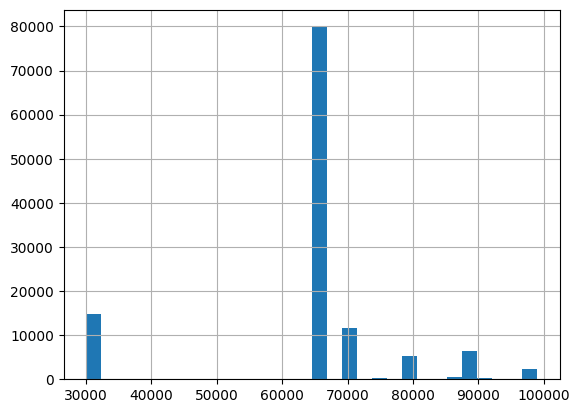

In [52]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].hist(bins=30)